## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [2]:
# Load the required packages
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

1.13.1


Load the MNIST data followed by scaling and reshaping to prepare it to pass through the network

In [0]:
# Load the Data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Prep the training data
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

# Prep the validation data
eval_images = test_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [0]:
# Set up the callbacks to end once 99.8% accuracy is reached


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.998):
            print("\n Reached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2769024   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
60000/60000 [==============================] - 19s 322us/sample - loss: 0.1245 - acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 16s 275us/sample - loss: 0.0429 - acc: 0.9866
Epoch 3/20
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0250 - acc: 0.9922
Epoch 4/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0150 - acc: 0.9952
Epoch 5/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0123 - acc: 0.9962
Epoch 6/20
60000/60000 [==============================] - 17s 275us/sample - loss: 0.0091 - acc: 0.9973
Epoch 7/20
60000/60000 [==============================] - 17s 278us/sample - loss: 0.0064 - acc: 0.9979
Epoch 8/20
59936/60000 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.9982
 Reached 99.8% accuracy so cancelling training!
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0054 - acc: 0.9982


### Model Evaluation

In [10]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

10000/10000 [==============================] - 1s 116us/sample - loss: 0.0470 - acc: 0.9889


In [0]:
def check_prediction(classifications, data, position):
    print('Model\'s predicted value: ', np.where(classifications[position] == np.max(classifications[position]))[0])
    print(plt.imshow(data[position]))

Model's predicted value:  [2]
AxesImage(72,49.5;446.4x298.98)


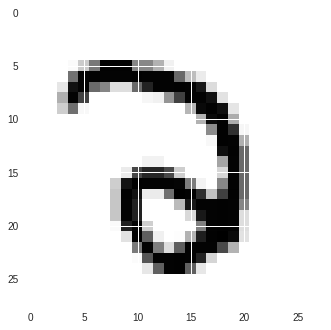

In [28]:
check_prediction(classifications, eval_images, 7619)